## 1. 라이브러리 및 데이터
## Library & Data

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
train = pd.read_csv('./따릉이/train.csv') # 모델 학습 파일
test = pd.read_csv('./따릉이/test.csv') # 모델 시험지 파일
submission = pd.read_csv('./따릉이/submission.csv') # 답안지 파일

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)  
  
### pd.DataFrame.head()
 - 데이터 프레임의 위에서부터 n개 행을 보여주는 함수
 - n의 기본 값(default값)dms 5

In [9]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [10]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [12]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


- id : 날짜와 시간별 id
- hour_bef_temperature : 1시간 전 기온
- hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
- hour_bef_windspeed : 1시간 전 풍속(평균)
- hour_bef_humidity : 1시간 전 습도
- hour_bef_visibility : 1시간 전 시정, 시계(특정 기상 상태에 따른 가시성을 의미)
- hour_bef_ozone : 1ㅣ간 전 오존
- hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지
- hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지 
- count : 시간에 따른 따릉이 대여 수

### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서부터 n개 행을 보여주는 함수
 - n의 기본 값(default)은 5

In [13]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


### pd.DataFrame.shape()
- 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [14]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


### pd.DdataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?  
 - type의 종류 : int, float, object 등등

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수
- 기술통계량이란?  
 - 해당 column에서 비어 있지 않은 값의 개수  
- 기술통계량 종류  
 - count : 해당 column에서 비어 있지 않은 값의 개수 
 - mean : 평균  
 - std : 표준편차  
 - min : 최솟값(이상치 포함)  
 - 25% (Q1) : 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값  
 - 50% (Q2) : 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)  
 - 75% (Q3) : 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값  
 - max : 최댓값(이상치 포함)  
- 이상치 : 울타리 밖에 있는 부분을 이상치라고 정의함  
 - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
 - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
 - $IQR$ = $Q_3 - Q_1$
 
 <img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">


In [16]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [17]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


### pd.DataFrame.groupby()
- 집단에 대한 통게량 확인

<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='hour'>

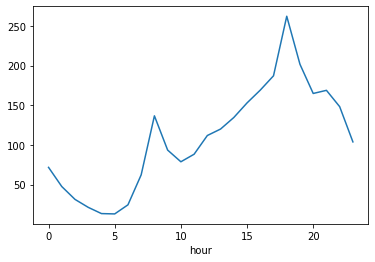

In [24]:
train.groupby('hour').mean()['count'].plot()

### plt.plot()의 스타일 
색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

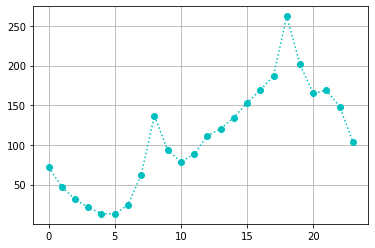

In [34]:
plt.plot(train.groupby('hour').mean()['count'], 'co:')
plt.grid()

### plt.plot(label, fontsize)
- 그래프 제목 생성

### plt.xlabel(label, fontsize)
- x축 이름 설정

### plt.ylabel(label, fontsize)
- y축 이름 설정

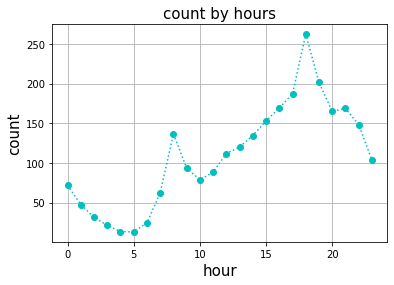

In [35]:
plt.plot(train.groupby('hour').mean()['count'], 'co:')
plt.grid()

plt.title('count by hours', fontsize = 15)
plt.xlabel('hour', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.savefig('picture.png')

### plt.axvline(x, color)
- 축을 가로지르는 세로 선 생성
  
### plt.text(x, y, s, fontsize)  
- 원하는 위치에 텍스트 생성

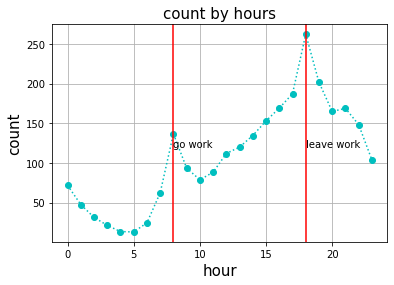

In [41]:
plt.plot(train.groupby('hour').mean()['count'], 'co:')
plt.grid()

plt.title('count by hours', fontsize = 15)
plt.xlabel('hour', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.text(8, 120, 'go work', fontsize=10)
plt.text(18, 120, 'leave work', fontsize=10)

plt.axvline(8, color = 'r')
plt.axvline(18, color = 'r')
plt.savefig('picture.png')

### 상관계수
- 상관계수 : 두 개의 변수가 같이 일어나는 강도를 나타내는 수치
- -1에서 1 사이의 값을 지닌다.
- -1이나 1인 수치는 현실 세게에서 관측되기 힘든 수치다.
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4 이상이면 두 개의 변수간에 상관성이 있다고 본다.

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)

- 상관관계는 인과관계와 다르다. 아래의 예시를 확인해보자.  
  
  ![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)

- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있다.
- 하지만 선글라스 판매량이 증가했기 때문에 아이크스림 판매액이 증가했다라고 해석하는 것은 타당하지 않다.
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것이다.

### pd.DataFrame.corr()
- correlation coefficient의 줄임말.

In [44]:
import seaborn as sns

<AxesSubplot:>

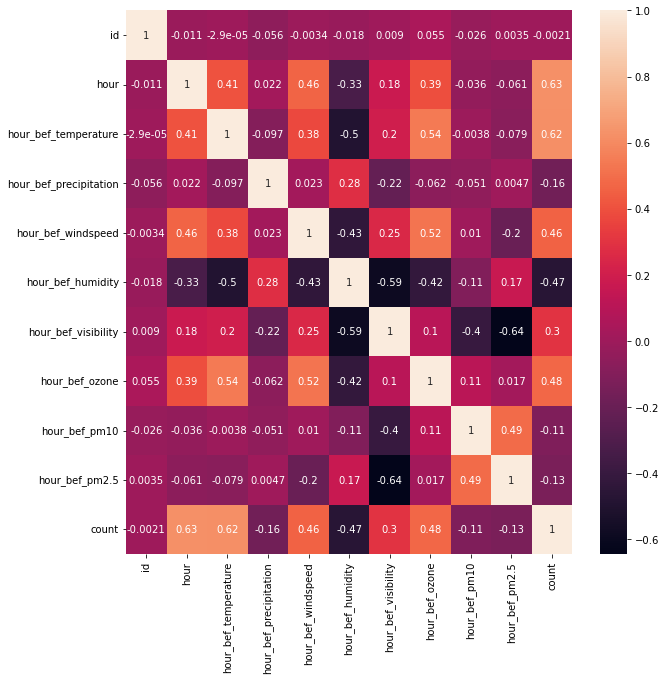

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = True)

## 3. 데이터 전처리
### Data cleansing & Pre-Processing

### pd.Series.isna()
- 결측치 여부를 확인한다.
- 결측치면 True, 아니면 False

In [75]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [63]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [69]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

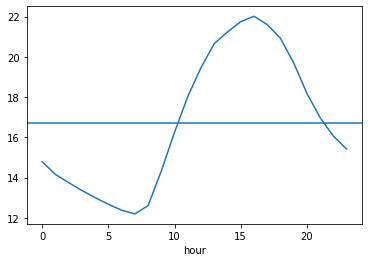

In [67]:
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())

<AxesSubplot:xlabel='hour'>

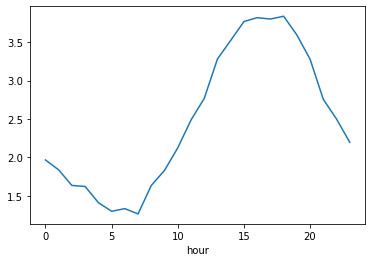

In [76]:
train.groupby('hour').mean()['hour_bef_windspeed'].plot()

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

In [73]:
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace=True)

In [78]:
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.965517, 780:3.278333, 946:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace=True)

In [88]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [84]:
test['hour_bef_temperature'].fillna(19.704918, inplace=True)

In [87]:
test['hour_bef_windspeed'].fillna(3.595082, inplace=True)

## 4. 변수 선택 및 선택 구축
## Feature Engineering & initial Modeling

In [56]:
features = [ 'hour', 'hour_bef_temperature', 'hour_bef_windspeed' ] 
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [ ]:
X -> MODEL -> Y

### sklean.ensemble.RandomForestRegressor()
- 랜덤 포레스트 모형

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False